In [1]:
import pandas as pd
import glob
import os
import re
import wordcloud
import seaborn as sns

from tqdm.notebook import tqdm
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from matplotlib import font_manager
from collections import Counter, defaultdict

# Tokenize 데이터 불러오기

In [2]:
from itertools import chain
df = pd.read_csv("D:/멀티캠퍼스/비타민_프로젝트/preprocess/final_token/png2/merge/merged_output_token.csv")
df

,top,url,brand,page,vitamin_title,date,sex,score,review,year,month,day,date_full,nouns,nouns_and_verbs
0,1,https://brand.naver.com/koreaeundanhc/products...,고려은단,1,"고려은단 멀티비타민 올인원 60캡슐, 3개",24.08.07.,NaN,5,알이 크다고 해서 걱정했는데 생각보다 잘 넘겨지더라고요. 괜히 돈 더내고 작은거 살...,2024,8,7,2024-08-07,"['알', '걱정', '생각', '돈', '종비', '하루만', '티', '주문',...","['알 크다고', '걱정 했는데', '생각 잘', '살뻔 했네요', '비만 먹는건'..."
1,1,https://brand.naver.com/koreaeundanhc/products...,고려은단,1,"고려은단 멀티비타민 올인원 60캡슐, 3개",24.08.07.,여성,5,원래 고려은단 비타민 D이지\n먹고있었는데 칼슘 마그네슘 들어간것이 필요해 ...,2024,8,7,2024-08-07,"['원래', '고려은단', '비타민 D', '칼슘', '마그네슘', '필요', '올...","['이지 먹고있었는데', '마그네슘 들어간것이', '구입 했어요', '조금 큰건데'..."
2,1,https://brand.naver.com/koreaeundanhc/products...,고려은단,1,"고려은단 멀티비타민 올인원 60캡슐, 3개",24.08.10.,NaN,5,몇년째 꾸준히 섭취하고있는 비타민이예요 하루한알만 챙기면 든든하네요 성분 함량 모두...,2024,8,10,2024-08-10,"['섭취', '비타민', '이예', '하루', '알', '성분', '함량', '마음']","['섭취 하고있는', '알 챙기면', '마음 들어요']"
3,1,https://brand.naver.com/koreaeundanhc/products...,고려은단,1,"고려은단 멀티비타민 올인원 60캡슐, 3개",24.08.10.,남성,5,고려은단이라면 믿을수 있을수 있다고 봅니다 \n회사가 생긴지 좀 됐고 제품을 만든것...,2024,8,10,2024-08-10,"['고려은단', '회사', '제품', '실력', '나이', '사람', '큰일', '...","['은 단이라면', '회사 생긴지', '좀 됐고', '제품 만든것도', '좀 됐고'..."
4,1,https://brand.naver.com/koreaeundanhc/products...,고려은단,1,"고려은단 멀티비타민 올인원 60캡슐, 3개",24.08.08.,NaN,5,빠른 배송과저렴한 가격 고품질 제품 매우만족합니다.\n재구매 제품입니다.\n추천합니...,2024,8,8,2024-08-08,"['배송', '가격', '품질', '제품', '매우', '만족', '재구매', '제...","['매우 재구매', '추천 합니다', '번창 하십시요']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287120,20,https://brand.naver.com/yuhan/products/5411758...,유한양행,336,센스밸런스 여성 멀티비타민 3개월분 (84정) 유한양행 여성용 비타민,21.03.19.,NaN,5,1일 1정 간편한 섭취,2021,3,19,2021-03-19,"['정', '섭취']",[]
287121,20,https://brand.naver.com/yuhan/products/5411758...,유한양행,336,센스밸런스 여성 멀티비타민 3개월분 (84정) 유한양행 여성용 비타민,21.03.25.,NaN,4,조아요~~~~~~~~~~,2021,3,25,2021-03-25,"['아', '요']",[]
287122,20,https://brand.naver.com/yuhan/products/5411758...,유한양행,336,센스밸런스 여성 멀티비타민 3개월분 (84정) 유한양행 여성용 비타민,21.03.06.,NaN,5,잘 먹을께요~유한이라서 좋아요,2021,3,6,2021-03-06,"['요', '유한']",[]
287123,20,https://brand.naver.com/yuhan/products/5411758...,유한양행,336,센스밸런스 여성 멀티비타민 3개월분 (84정) 유한양행 여성용 비타민,21.03.22.,NaN,5,조아요조아요조아요조아요,2021,3,22,2021-03-22,"['아', '요조', '아', '요조', '아', '요조', '아']",[]


In [3]:
opath_token ="D:/멀티캠퍼스/비타민_프로젝트/preprocess/final_token/png2/"
path_token = "D:/멀티캠퍼스/비타민_프로젝트/preprocess/final_token/png2/"
file_list = glob.glob(path_token + "*.csv")  # .csv 파일만 가져옴

# 파일명만 추출
file_list = [file.split("\\")[-1] for file in file_list]

file_name_token = file_list[0]

df = pd.read_csv(path_token + file_name_token, on_bad_lines="skip")

In [4]:
file_name_token

'01_고려은단_df_token.csv'

In [5]:
top = file_name_token[:2]
name = file_name_token.split("_")[1]

In [6]:
df['nouns'] = df['nouns'].apply(eval)

In [7]:
df_nouns = sum(df["nouns"], [])
df_nouns

['알',
 '걱정',
 '생각',
 '돈',
 '종비',
 '하루만',
 '티',
 '주문',
 '비타민c',
 '시너지',
 '효과',
 '종비',
 '비타민c',
 '효과',
 '전날',
 '밤',
 '감기',
 '기운',
 '감기약',
 '다음날',
 '차도',
 '다음날',
 '끼니',
 '종비',
 '비타민c',
 '감기',
 '기운',
 '피곤',
 '굿',
 '굿',
 '앞',
 '종비',
 '비타민c',
 '원래',
 '고려은단',
 '비타민 D',
 '칼슘',
 '마그네슘',
 '필요',
 '올인원',
 '구입',
 '올인원',
 '종류',
 '이지',
 '하루',
 '두아',
 '알맹이',
 '제품',
 '하루',
 '알',
 '알맹이',
 '문제',
 '사람',
 '주문',
 '몸',
 '변화',
 '섭취',
 '비타민',
 '이예',
 '하루',
 '알',
 '성분',
 '함량',
 '마음',
 '고려은단',
 '회사',
 '제품',
 '실력',
 '나이',
 '사람',
 '큰일',
 '없다',
 '배송',
 '가격',
 '품질',
 '제품',
 '매우',
 '만족',
 '재구매',
 '제품',
 '추천',
 '감사',
 '사업',
 '번창',
 '효과',
 '하루',
 '몸',
 '차이',
 '고려은단',
 '비타민',
 '마그네슘',
 '포함',
 '종합비타민',
 '주문',
 '부모',
 '피곤',
 '공식',
 '몰',
 '유통기한',
 '안심',
 '종합비타민',
 '선택',
 '이유',
 '고려은단',
 '인지도',
 '한국인',
 '설계',
 '영양제',
 '칼슘',
 '마그네슘',
 '동시',
 '복용',
 '흡수',
 '감안',
 '제조',
 '한',
 '건지',
 '문제',
 '제조',
 '한',
 '건지',
 '복용',
 '횟수',
 '멀티 비타민',
 '표',
 '하루',
 '알',
 '알',
 '생각',
 '커서',
 '때',
 '고민',
 '보니',
 '불편',
 '구매',
 '다',
 '건강',
 '제품',
 

In [8]:
#제외할 단어 추가
stop_words = ["주문","배송", "구매", "고려은단", "제품", "비타민", "감사", "복용", "포장", "하루", "구입", "가족", "!!", 
              "!!!","때","굿", "생각", "이번", "오쏘몰", "뉴트리코어", "가격", "얼라이브", "영양제", "다","요", "넘", "이",
              "중", "하마", "감", "티", "류", "습", "헤", "레", "합", "엘", "말", "한", "아", "용", "강", "전", "직", "은", "추",
              "담","달", "칼", "때", "포", "함소아","세노비스", "사","유한양행", "쇼핑백", "센트룸", "전", "물", "드", "문", "게","해",
              "날", "곧", "먹", "이랑", "일", "예", "곳", "민", "안", "라", "당", "길", "안나", "과", "후", "조", "보니", "니다", "이지",
              "그런지", "요조", "중인", "이예", "도", "종", "도스", "해서", "정", "르", "에", "식", "곰", "제가", "이건", "요즘"]

# 불용어를 제외한 단어만 남기기
n_adj = [word for word in df_nouns if not word in stop_words]

def replace_vitamins(word):
    word = re.sub(r'비타민\s*a', '비타민A', word)
    word = re.sub(r'비타민\s*A', '비타민A', word)
    word = re.sub(r'비타민\s*b', '비타민B', word)
    word = re.sub(r'비타민\s*c', '비타민C', word)
    word = re.sub(r'비타민\s*C', '비타민C', word)
    word = re.sub(r'비타민\s*d', '비타민D', word)
    word = re.sub(r'비타민\s*D', '비타민D', word)
    word = re.sub(r'멀티\s*비타민', '멀티비타민', word)
    word = re.sub(r'\b비타인\b', '비타민', word)
    word = re.sub(r'아이들', '아이', word)
    word = re.sub(r'애기', '아이', word)
    word = re.sub(r'아기', '아이', word)
    word = re.sub(r'애', '아이', word)
    return word

n_adj = [replace_vitamins(word) for word in n_adj ]
n_adj

['알',
 '걱정',
 '돈',
 '종비',
 '하루만',
 '비타민C',
 '시너지',
 '효과',
 '종비',
 '비타민C',
 '효과',
 '전날',
 '밤',
 '감기',
 '기운',
 '감기약',
 '다음날',
 '차도',
 '다음날',
 '끼니',
 '종비',
 '비타민C',
 '감기',
 '기운',
 '피곤',
 '앞',
 '종비',
 '비타민C',
 '원래',
 '비타민D',
 '칼슘',
 '마그네슘',
 '필요',
 '올인원',
 '올인원',
 '종류',
 '두아',
 '알맹이',
 '알',
 '알맹이',
 '문제',
 '사람',
 '몸',
 '변화',
 '섭취',
 '알',
 '성분',
 '함량',
 '마음',
 '회사',
 '실력',
 '나이',
 '사람',
 '큰일',
 '없다',
 '품질',
 '매우',
 '만족',
 '재구매',
 '추천',
 '사업',
 '번창',
 '효과',
 '몸',
 '차이',
 '마그네슘',
 '포함',
 '종합비타민',
 '부모',
 '피곤',
 '공식',
 '몰',
 '유통기한',
 '안심',
 '종합비타민',
 '선택',
 '이유',
 '인지도',
 '한국인',
 '설계',
 '칼슘',
 '마그네슘',
 '동시',
 '흡수',
 '감안',
 '제조',
 '건지',
 '문제',
 '제조',
 '건지',
 '횟수',
 '멀티비타민',
 '표',
 '알',
 '알',
 '커서',
 '고민',
 '불편',
 '건강',
 '집',
 '대부분',
 '건강',
 '보조',
 '고려',
 '매하',
 '볼',
 '아침',
 '오후',
 '맘',
 '유통기한',
 '종류',
 '미네랄',
 '배합',
 '재구매',
 '의사',
 '원래',
 '멀티비타민',
 '타사',
 '리',
 '느낌',
 '건지',
 '멀티비타민',
 '피곤',
 '느낌',
 '속쓰림',
 '불편',
 '몸',
 '아침',
 '식사',
 '한정',
 '상자',
 '사진',
 '상자',
 '완충',
 '쓰레기',
 '알약',
 '한번',
 '종비',

In [9]:
counts = Counter(n_adj)
counts_dict = dict(counts)
df_counts = pd.DataFrame.from_dict(counts_dict , orient='index', columns=['count'])
df_counts_all = df_counts.reset_index().rename(columns={'index': 'word'}).sort_values(by='count', ascending=False)
# save = df_counts_all.to_csv("D:/멀티캠퍼스/비타민_프로젝트/preprocess/COUNT/"+ f'{top}_{name}_count.csv', encoding="utf-8-sig", index=False)

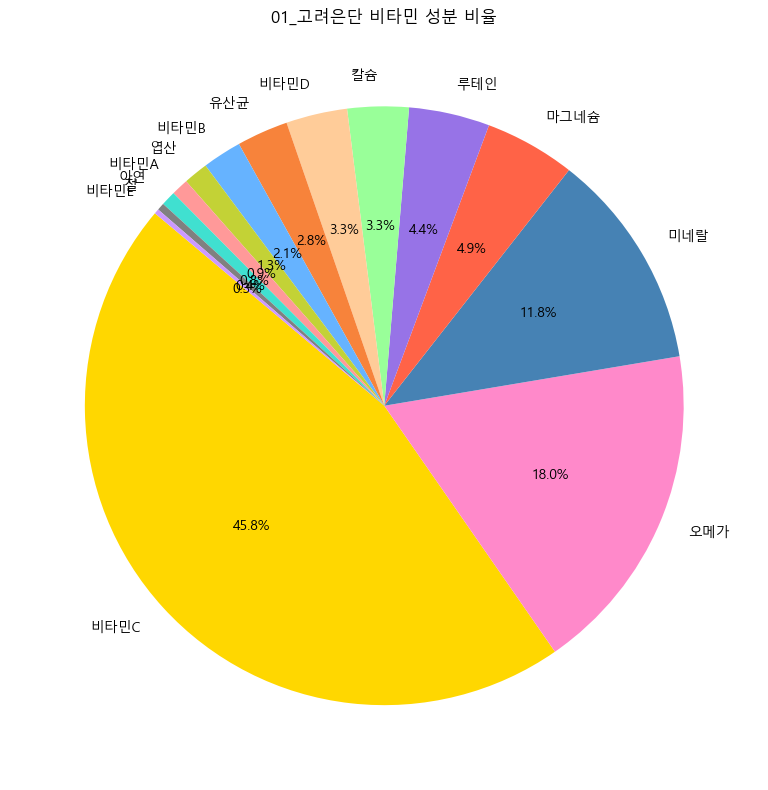

In [11]:
target_words = ['비타민A', "비타민B", "비타민C", "비타민D", "비타민E", "칼슘", "마그네슘", "아연", "오메가", "미네랄", "엽산", "루테인", "유산균", "철"]

# 특정 단어가 포함된 행만 필터링
filtered_df = df_counts_all[df_counts_all['word'].isin(target_words)]

color_mapping = {
    '비타민A' : '#FF9999',  # 연한 빨강
    '비타민B' : '#66B3FF',  # 연한 파랑
    '비타민C' : '#FFD700',  # 연한 초록
    '비타민D' : '#FFCC99',  # 연한 오렌지
    '비타민E' : '#CC99FF',  # 연한 보라
    '칼슘'    : '#99FF99',     # 금색
    '마그네슘': '#FF6347',  # 토마토
    '아연'    : '#40E0D0',     # 터콰이즈
    '오메가'  : '#FF89CA',   # 핑크
    '미네랄'  : '#4682B4',    # 스틸 블루
    '엽산'  : '#C3D236',    # 스틸 블루
    '루테인'  : '#9773E7',   # 약간 진한보라
    '유산균' : '#F7833B',    # 약간 주황
    '철'    : 'gray'
}
colors = [color_mapping[word] for word in filtered_df['word']]

# 파이차트 그리기
plt.rc("font", family="Malgun Gothic")
plt.figure(figsize=(8, 8))
plt.pie(filtered_df['count'], labels=filtered_df['word'], colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
plt.title(f'{top}_{name} 비타민 성분 비율')
# plt.title("top1 ~ top 20 비타민 성분 비율")
plt.tight_layout()
# plt.show()
# plt.savefig(opath + f'{top}_{name}'+ "_비타민 성분 비율.png")
# plt.savefig(opath + "all_비타민 성분 비율.png")

In [12]:
word_cloud = WordCloud(
    font_path = "C:/Windows/Fonts/Malgun.ttf",
    background_color = "white",
    width=800, height=600 , 
    # colormap = "seismic"
    
).generate_from_frequencies(counts)

In [13]:
plt.rc("font", family="Malgun Gothic")

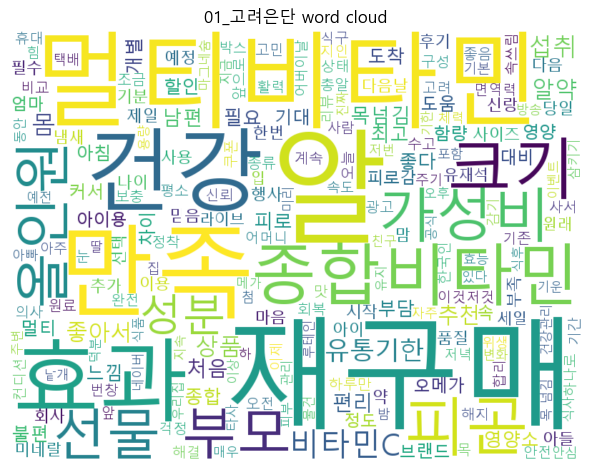

In [14]:
plt.axis('off')
plt.title(f'{top}_{name} '+ 'word cloud')
# plt.title("top 1 ~ 20 word cloud")
plt.tight_layout()
plt.imshow(word_cloud, interpolation="bilinear")
# plt.savefig(opath + f'{top}_{name}_'+ "world_cloud.png")
# plt.savefig(opath + "all_world_cloud.png")

# 별점별로 워드 클라우드

In [15]:
df_12 = df[df["score"] < 4].drop_duplicates(subset=["review"])
df_nouns_12 = sum(df_12["nouns"], [])
# df_nouns_12 = sum(df_12["nouns_and_verbs"], [])

n_adj_12 = [word for word in df_nouns_12 if not word in stop_words]
n_adj_12 = [replace_vitamins(word) for word in n_adj_12 ]

In [16]:
counts_12 = Counter(n_adj_12)
counts_dict_12 = dict(counts_12)
df_counts_12 = pd.DataFrame.from_dict(counts_dict_12 , orient='index', columns=['count'])
df_counts_all_12 = df_counts_12.reset_index().rename(columns={'index': 'word'}).sort_values(by='count', ascending=False)
# save = df_counts_all.to_csv("D:/멀티캠퍼스/비타민_프로젝트/preprocess/COUNT/"+ f'{top}_{name}_count.csv', encoding="utf-8-sig", index=False)
# save = df_counts_all.to_csv("D:/멀티캠퍼스/비타민_프로젝트/preprocess/COUNT/all_count.csv", encoding="utf-8-sig", index=False)

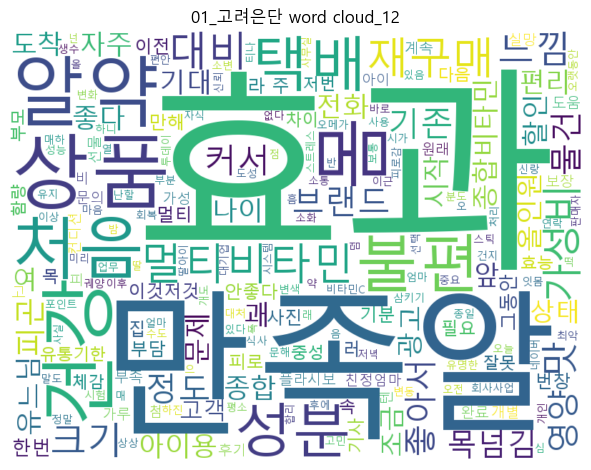

In [17]:
word_cloud_12 = WordCloud(
    font_path = "C:/Windows/Fonts/Malgun.ttf",
    background_color = "white",
    width=800, height=600 , 
    # colormap = "seismic"
    
).generate_from_frequencies(counts_12)

plt.axis('off')
plt.rc("font", family="Malgun Gothic")
plt.title(f'{top}_{name} '+ 'word cloud_12')
# plt.title("top 1 ~ 20 word cloud")
plt.tight_layout()
plt.imshow(word_cloud_12, interpolation="bilinear")
# plt.savefig(opath + f'{top}_{name}_'+ "world_cloud_12.png")
# plt.savefig(opath + "all_world_cloud.png")

# 특정단어 top 10 

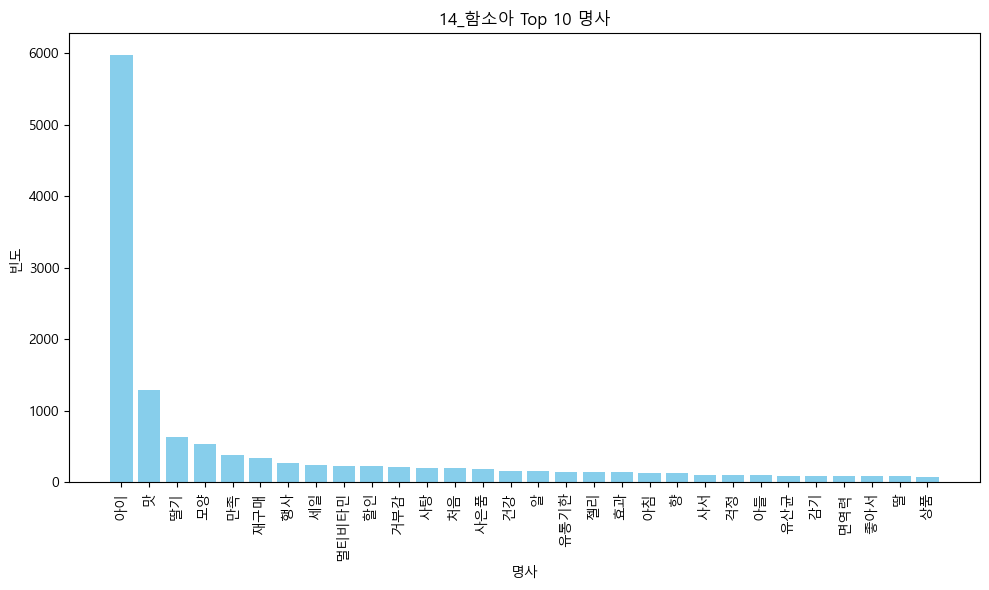

In [37]:
noun_counts = Counter(n_adj)

# 상위 10개 명사 추출
top_nouns = noun_counts.most_common(30)

# 데이터프레임으로 변환 (시각화를 위해)
df_top_nouns = pd.DataFrame(top_nouns, columns=['noun', 'count'])

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.rc("font", family="Malgun Gothic")
plt.bar(df_top_nouns['noun'], df_top_nouns['count'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('명사')
plt.ylabel('빈도')
plt.title(f'{top}_{name} Top 10 명사')
# plt.show()
plt.tight_layout()
plt.savefig(opath + f'{top}_{name} 명사.png')